## Practical Work 1

implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [140]:
import numpy as np 
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
#tells Matplotlib to render the plots as static images within the notebook.
%matplotlib inline   

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [141]:
df = pd.read_csv(r"C:\Users\aliay\OneDrive\Desktop\iTi\20 - Optimization\Day1\RegData - RegData.csv", header = None)
df.head()

,0,1
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9


#### Explore your data

In [142]:
print(df.shape)
print("-"*20)  
print(df.info())
print("-"*20)  
print(df.describe())
print("-"*20)  
print(df.isnull().sum())

(13, 2)
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       13 non-null     float64
 1   1       13 non-null     float64
dtypes: float64(2)
memory usage: 340.0 bytes
None
--------------------
               0          1
count  13.000000  13.000000
mean    5.953846   5.569231
std     1.714942   1.314271
min     2.900000   4.000000
25%     4.900000   4.400000
50%     6.000000   5.200000
75%     6.700000   6.100000
max     9.800000   7.900000
--------------------
0    0
1    0
dtype: int64


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [143]:
columns = ['X', 'Y']    
df.columns = columns 
df.head()   

,X,Y
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9


In [144]:
X = df['X'].values
y = df['Y'].values

In [145]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [146]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

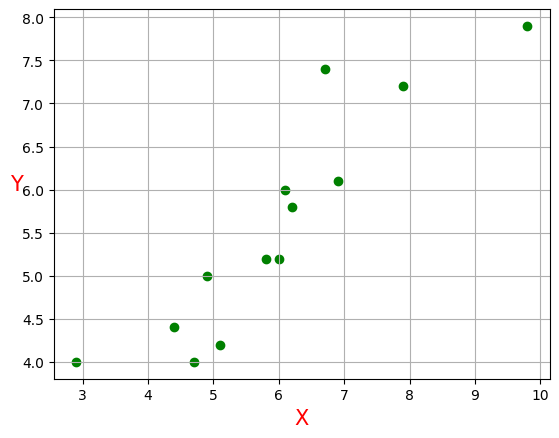

In [147]:
plt.scatter(X,y,color='green')
plt.xlabel('X',fontsize=15,color='red')
plt.ylabel('Y',fontsize=15,color='red',rotation=0) 
plt.grid()
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

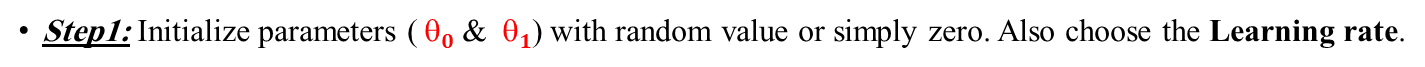

In [148]:
theta_0 = 0  # intercept
theta_1 = 0  # Slope   
learning_rate = 0.01
iterations = 1000
n = len(df)  # Number of data points

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.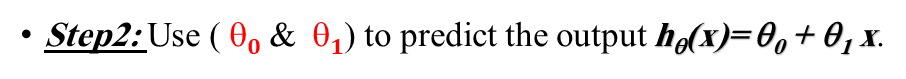
#### Note: you will need to iterate through all data points

In [149]:
y_pred = []
# iterating on each data point
for i in range(len(X)):
    r = theta_0 + theta_1 * X[i]
    y_pred.append(r)

y_pred = np.array(y_pred)
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).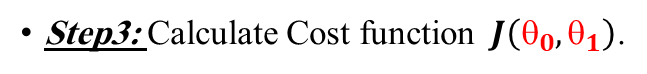
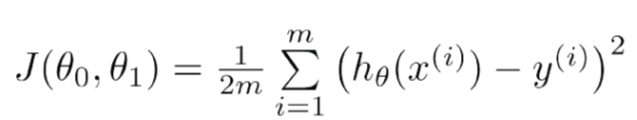

In [150]:
def compute_cost(X, y, theta_0, theta_1):
    n = len(X)  
    total_cost = 0

    for i in range(n):
        y_pred = theta_0 + theta_1 * X[i]
        squared_error = (y_pred - y[i]) ** 2
        total_cost += squared_error

    cost = (1 / (2 * n)) * total_cost
    return cost

cost = compute_cost(X, y, theta_0, theta_1)
print(f" Cost Function (J): {cost:.4f}")

 Cost Function (J): 16.3054


### Step4: Calculate the gradient.
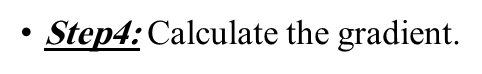
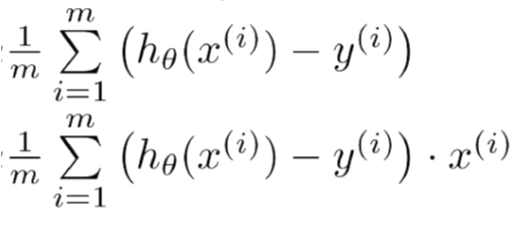

In [151]:
def compute_gradients(X, y, theta_0, theta_1):
    n = len(X) 
    d_theta_0 = 0  # gradient of theta_0
    d_theta_1 = 0  # gradient of theta_1

    for i in range(n):
        y_pred = theta_0 + theta_1 * X[i]

        d_theta_0 += (y_pred - y[i])
        d_theta_1 += (y_pred - y[i]) * X[i]

    d_theta_0 /= n
    d_theta_1 /= n

    return d_theta_0, d_theta_1

d_theta_0, d_theta_1 = compute_gradients(X, y, theta_0, theta_1)

print(f"gradient of theta_0   >>> (d_theta_0): {d_theta_0:.4f}")
print(f"gradient of theta_1  >>> (d_theta_1): {d_theta_1:.4f}")

gradient of theta_0   >>> (d_theta_0): -5.5692
gradient of theta_1  >>> (d_theta_1): -35.0438


### Step5: Update the parameters (simultaneously).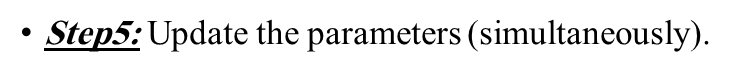
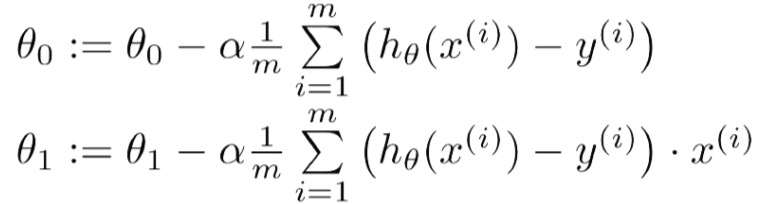

In [152]:
def update_parameters(theta_0, theta_1, d_theta_0, d_theta_1, learning_rate):
    theta_0 = theta_0 - learning_rate * d_theta_0
    theta_1 = theta_1 - learning_rate * d_theta_1

    return theta_0, theta_1

theta_0, theta_1 = update_parameters(theta_0, theta_1, d_theta_0, d_theta_1, learning_rate)

print(f"updated theta_0: {theta_0:.4f}")
print(f"updated theta_1: {theta_1:.4f}")

updated theta_0: 0.0557
updated theta_1: 0.3504


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.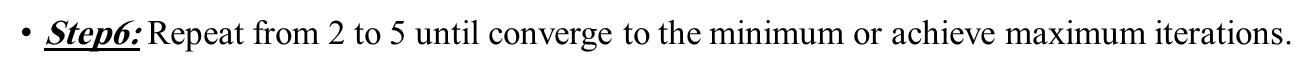

In [153]:
theta_0 = 0  # Intercept
theta_1 = 0  # Slope
learning_rate = 0.01
iterations = 1000
tolerance = 1e-6  # for a convergence check >> usually we put it with this small value

for i in range(iterations):
    d_theta_0, d_theta_1 = compute_gradients(X, y, theta_0, theta_1)

    theta_0, theta_1 = update_parameters(theta_0, theta_1, d_theta_0, d_theta_1, learning_rate)

    cost = compute_cost(X, y, theta_0, theta_1)

    # print progress every 100 iterations
    if i % 100 == 0:
        print(f"iteration {i}:>>>>  Cost = {cost:.4f}, theta_0 = {theta_0:.4f}, theta_1 = {theta_1:.4f}")

    # Step 5: Check for convergence   >>>> if we found that the gradient is so small so we will stop updating
    if abs(d_theta_0) < tolerance and abs(d_theta_1) < tolerance:
        print(f"Converged at iteration {i}")
        break

print(f"Final parameters: theta_0 = {theta_0:.4f}, theta_1 = {theta_1:.4f}")
print(f"Final Cost: {cost:.4f}")


iteration 0:>>>>  Cost = 6.1756, theta_0 = 0.0557, theta_1 = 0.3504
iteration 100:>>>>  Cost = 0.1942, theta_0 = 0.2278, theta_1 = 0.8831
iteration 200:>>>>  Cost = 0.1875, theta_0 = 0.3088, theta_1 = 0.8704
iteration 300:>>>>  Cost = 0.1817, theta_0 = 0.3843, theta_1 = 0.8586
iteration 400:>>>>  Cost = 0.1766, theta_0 = 0.4548, theta_1 = 0.8476
iteration 500:>>>>  Cost = 0.1721, theta_0 = 0.5205, theta_1 = 0.8373
iteration 600:>>>>  Cost = 0.1683, theta_0 = 0.5818, theta_1 = 0.8277
iteration 700:>>>>  Cost = 0.1649, theta_0 = 0.6390, theta_1 = 0.8188
iteration 800:>>>>  Cost = 0.1620, theta_0 = 0.6924, theta_1 = 0.8105
iteration 900:>>>>  Cost = 0.1595, theta_0 = 0.7421, theta_1 = 0.8027
Final parameters: theta_0 = 0.7881, theta_1 = 0.7955
Final Cost: 0.1573


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [154]:
y_predicted = theta_0 + (theta_1 * X)
y_predicted

array([3.09505537, 6.11793184, 4.6860431 , 7.07252471, 8.58396314,
       6.27703084, 5.6406356 , 5.72018491, 5.56108628, 4.84514173,
       4.5269441 , 4.28829617, 5.40198766])

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

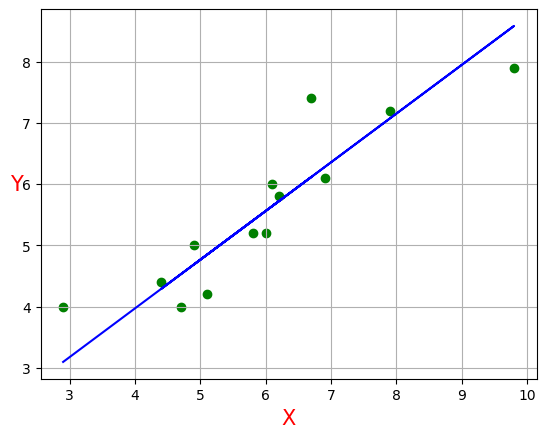

In [155]:
plt.scatter(X,y,color='green')
plt.xlabel('X',fontsize=15,color='red')         
plt.ylabel('Y',fontsize=15,color='red',rotation=0) 
plt.grid()
plt.plot(X,y_predicted,color='blue')
plt.show()

#### Use R2 score to evaluate LR equation 

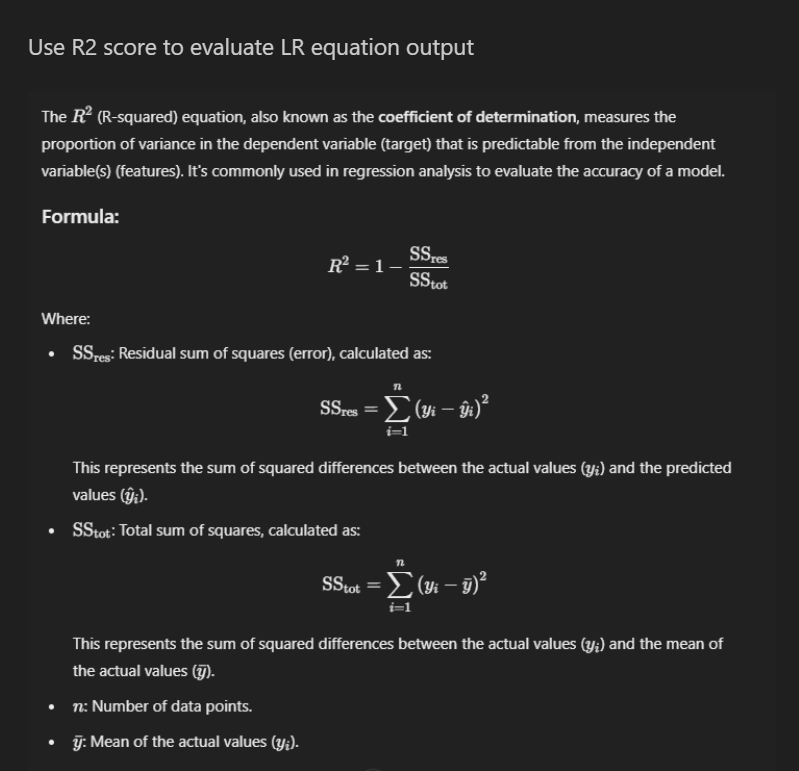
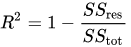
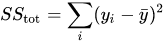
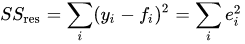
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [156]:
SS_res = sum((y - y_predicted)**2)    
SS_tot = sum((y - np.mean(y))**2)

r_2 = 1 - (SS_res / SS_tot)         
print(f"the R Squared value is : {r_2} so we have accuracy of {r_2*100:.2f} %")   

the R Squared value is : 0.8026968191397711 so we have accuracy of 80.27 %


In [157]:
from sklearn.metrics import r2_score    

r_2 = r2_score(y, y_predicted)
print(f"the R Squared value is : {r_2} so we have accuracy of {r_2*100:.2f} %")

the R Squared value is : 0.8026968191397711 so we have accuracy of 80.27 %


## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [158]:
theta_0 = 0 
theta_1 = 0
alpha = 0.01    # as a learning rate
iterations = 1000
losses = [] 

for i in range(iterations): 
    y_predicted = theta_0 + (theta_1 * X)
    cost_fun = 1/(2*len(df)) * sum((y_predicted - df['Y'])**2)
    losses.append(cost_fun)
    differentiation_to_theta_0 = 1/len(df) * sum(y_predicted - y)
    differentiation_to_theta_1 = 1/len(df) * sum((y_predicted - y) * X)
    theta_0 = theta_0 - alpha * differentiation_to_theta_0  
    theta_1 = theta_1 - alpha * differentiation_to_theta_1
   
    print("theta_0 after {} iterations is {}".format(i+1,theta_0))
    print("theta_1 after {} iterations is {}".format(i+1,theta_1))
    print("-"*50)
    print("cost function after {} iterations is {}".format(i+1,cost_fun))
    print("-"*100)


theta_0 after 1 iterations is 0.05569230739769232
theta_1 after 1 iterations is 0.35043846043215376
--------------------------------------------------
cost function after 1 iterations is 16.305384479692318
----------------------------------------------------------------------------------------------------
theta_0 after 2 iterations is 0.08996312489803085
theta_1 after 2 iterations is 0.5638229867322322
--------------------------------------------------
cost function after 2 iterations is 6.175608808043305
----------------------------------------------------------------------------------------------------
theta_0 after 3 iterations is 0.1111866477959166
theta_1 after 3 iterations is 0.6937329799990051
--------------------------------------------------
cost function after 3 iterations is 2.4178300654795644
----------------------------------------------------------------------------------------------------
theta_0 after 4 iterations is 0.12446329431785444
theta_1 after 4 iterations is 0.7

In [159]:
y_predicted

array([3.09480993, 6.11795302, 4.68593799, 7.07263008, 8.58420182,
       6.27706605, 5.64061468, 5.720171  , 5.56105835, 4.84505065,
       4.52682496, 4.28815597, 5.40194569])

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

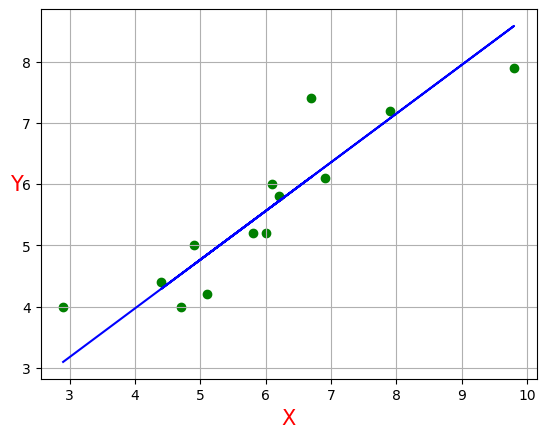

In [160]:
plt.scatter(X,y,color='green')
plt.xlabel('X',fontsize=15,color='red')         
plt.ylabel('Y',fontsize=15,color='red',rotation=0) 
plt.grid()
plt.plot(X,y_predicted,color='blue')
plt.show()

In [161]:
from sklearn.metrics import r2_score    

r_2 = r2_score(y, y_predicted)
print(f"the R Squared value is : {r_2} so we have accuracy of {r_2*100:.2f} %")

the R Squared value is : 0.8026709330593267 so we have accuracy of 80.27 %


### Plot loss vs. iterations

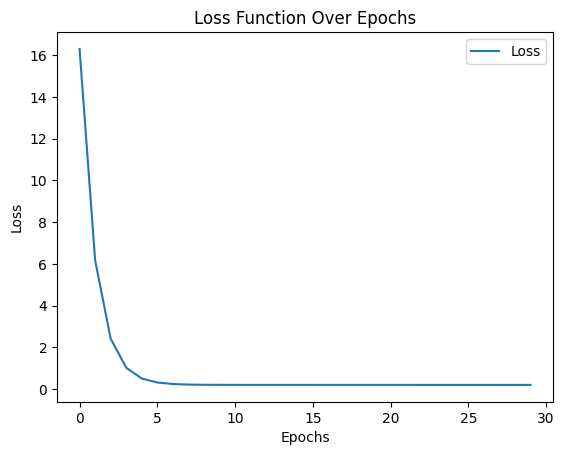

In [162]:
# i made a small range to see the influance clearly 
plt.plot(range(30), losses[:30], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function Over Epochs')
plt.legend()
plt.show()

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [163]:
data = pd.read_csv(r"C:\Users\aliay\OneDrive\Desktop\iTi\20 - Optimization\Day1\exam_scores.csv")
data.head()

,FINAL,EXAM3,EXAM2,EXAM1
0,152.0,75.0,80.0,73.0
1,185.0,93.0,88.0,93.0
2,180.0,90.0,91.0,89.0
3,196.0,100.0,98.0,96.0
4,142.0,70.0,66.0,73.0


In [164]:
print(data.shape)
print("-"*20)  
print(data.info())
print("-"*20)  
print(data.describe())
print("-"*20)  
print(data.isnull().sum())

(25, 4)
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FINAL   25 non-null     float64
 1   EXAM3   25 non-null     float64
 2   EXAM2   25 non-null     float64
 3   EXAM1   25 non-null     float64
dtypes: float64(4)
memory usage: 932.0 bytes
None
--------------------
            FINAL       EXAM3      EXAM2      EXAM1
count   25.000000   25.000000  25.000000  25.000000
mean   162.040000   81.480000  79.480000  79.040000
std     24.044195   11.765486  12.503733  12.279658
min    101.000000   55.000000  46.000000  47.000000
25%    148.000000   73.000000  73.000000  73.000000
50%    164.000000   85.000000  82.000000  79.000000
75%    180.000000   90.000000  89.000000  88.000000
max    196.000000  100.000000  98.000000  96.000000
--------------------
FINAL    0
EXAM3    0
EXAM2    0
EXAM1    0
dtype: int64


In [165]:
X = data.iloc[:, 1:] 
y = data.iloc[:, 0]

In [166]:
X = X.values
X[:5]

array([[ 75.,  80.,  73.],
       [ 93.,  88.,  93.],
       [ 90.,  91.,  89.],
       [100.,  98.,  96.],
       [ 70.,  66.,  73.]])

In [167]:
y = y.values.reshape(-1,1)
y[:5]

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.]])

### Repeat your implementation but for more than one variable

In [168]:
m = len(data)
ones = np.ones((m,1))
X = np.concatenate((ones,X),axis=1)

In [169]:
X[:5]

array([[  1.,  75.,  80.,  73.],
       [  1.,  93.,  88.,  93.],
       [  1.,  90.,  91.,  89.],
       [  1., 100.,  98.,  96.],
       [  1.,  70.,  66.,  73.]])

In [170]:
# initialize params
theta = np.zeros((4, 1)) 
learning_rate = 0.0001
iterations = 1200

In [171]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def compute_gradients(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    d_theta = (1 / m) * X.T.dot(predictions - y)
    return d_theta

def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = []
    for i in range(iterations):
        d_theta = compute_gradients(X, y, theta)
        theta -= learning_rate * d_theta
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")
    return theta, cost_history


final_theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)
print(f"Final theta:\n{final_theta}")


Iteration 0: Cost 12348.667642841163
Iteration 100: Cost 8.292882736227483
Iteration 200: Cost 4.365178833326624
Iteration 300: Cost 3.9593698551320933
Iteration 400: Cost 3.6850822974276105
Iteration 500: Cost 3.49777281616515
Iteration 600: Cost 3.3687475712731554
Iteration 700: Cost 3.2790557634363364
Iteration 800: Cost 3.216114573448866
Iteration 900: Cost 3.171518955309528
Iteration 1000: Cost 3.139616645719121
Iteration 1100: Cost 3.1165782854958297
Final theta:
[[0.00141145]
 [1.07607284]
 [0.51614127]
 [0.42273666]]


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [172]:
y_pred = X.dot(theta)
y_pred

array([[152.85795285],
       [184.81112745],
       [181.44038609],
       [198.77326007],
       [140.25161081],
       [105.33295947],
       [150.22230426],
       [113.33831645],
       [174.40121749],
       [164.22190706],
       [143.85344779],
       [142.77155093],
       [186.27197067],
       [153.24222712],
       [151.20497249],
       [188.55548725],
       [144.85841988],
       [180.77057006],
       [177.22949932],
       [158.67220566],
       [175.9005231 ],
       [174.45083181],
       [167.28078841],
       [151.37029527],
       [190.81218948]])

### Plot loss vs. iterations

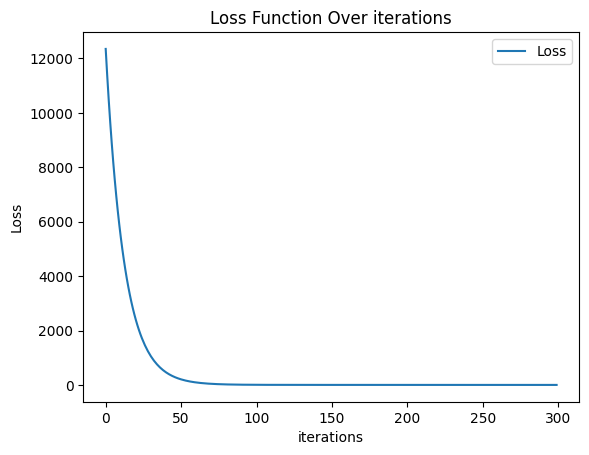

In [173]:
plt.plot(range(300), cost_history[:300], label='Loss')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.title('Loss Function Over iterations')
plt.legend()
plt.show()

#### Use R2 score to evaluate LR equation output

In [174]:
from sklearn.metrics import r2_score

acc = r2_score(y,y_pred)
print(f"r2_score is {acc} , so we have accuracy {acc*100:.2f} %")

r2_score is 0.9888290419416407 , so we have accuracy 98.88 %


# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [175]:
from sklearn.linear_model import LinearRegression

In [176]:
df.head()

,X,Y
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9


#### Train the model (fit the model to the training data)

In [177]:
lr = LinearRegression()

In [178]:
lr.fit(df['X'].values.reshape(-1,1),df['Y'])

LinearRegression()

In [179]:
print(lr.intercept_)
# slope
print(lr.coef_)

1.4341107664655022
[0.69452919]


#### Predict y values using the trained model

In [180]:
y_pred = lr.predict(df['X'].values.reshape(-1,1))
y_pred

array([3.44824549, 6.08745623, 4.83730388, 6.92089146, 8.240497  ,
       6.22636227, 5.67073878, 5.74019163, 5.60128593, 4.97620959,
       4.69839784, 4.49003928, 5.46238022])

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

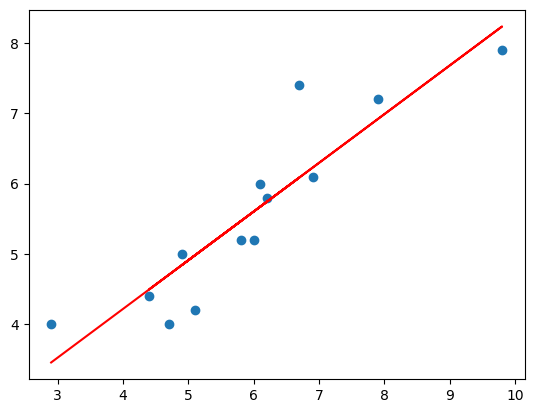

In [181]:
plt.scatter(df['X'],df['Y'])
plt.plot(df['X'],y_pred,color='r')

#### Use R2 score to evaluate model output

In [182]:
r2_score(df['Y'],y_pred)

0.8213156778363777

### Repeat for Mulivariate

In [183]:
data.head()

,FINAL,EXAM3,EXAM2,EXAM1
0,152.0,75.0,80.0,73.0
1,185.0,93.0,88.0,93.0
2,180.0,90.0,91.0,89.0
3,196.0,100.0,98.0,96.0
4,142.0,70.0,66.0,73.0


In [184]:
X = data.drop("FINAL",axis=1)
Y = data['FINAL']

In [187]:
lr.fit(X,Y)

LinearRegression()

In [188]:
y_pred = lr.predict(X)
y_pred

array([152.60720439, 185.08011472, 181.78158547, 199.74522647,
       139.1747207 , 103.69391793, 150.2632274 , 112.82069728,
       174.55948394, 164.49442094, 143.42337551, 142.23416416,
       186.54285759, 152.40794527, 151.24409108, 189.12496613,
       143.50219218, 181.89389361, 177.29838914, 158.34934019,
       176.57742415, 174.66365778, 167.68889392, 150.63279846,
       191.1954116 ])

In [189]:
print(lr.intercept_)
print(lr.coef_)

-4.336102401240197
[1.16744422 0.54251876 0.35593822]


In [190]:
r2_score(Y,y_pred)

0.9896615789448399